# Exploratory Data Analysis on Seattle Collision Data

## 1. Introduction

As I moved to a new neighborhood in Seattle, I started noticing different types of intersections. For instance, at some intersections:

- there is no stop sign for either direction of the traffic. 
- where one street is a steep hill, it is hard to make a left turn if there are a lot of cars parked on the other street. 
- there are roundabouts, which are known to be effective in preventing accidents.

All of these observations got me interested in looking into the charatcteristics of intersections and the number of accidents at different intersections. As a starting point, I decided to look into collision data made available by Seattle Department of Transportation. The primary goals of this data exploration are to:

1. Identify dangerous locations in Seattle
1. Identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
1. Examine increase or decrease in number of accidents over time

The data for this exploratory analysis comes from the following website:
https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions

## 2. Reading and cleaning the dataframe

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

alt.renderers.enable('mimetype')

import warnings
warnings.filterwarnings("ignore") 

In [2]:
url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])

In [3]:
df = rdf.copy()

In [4]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.336330,47.608989,1,39700,39700,2071591,Matched,Block,NaN,UNION ST BETWEEN 3RD AVE AND 4TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,3,0,0,2,0,0,0,2005/12/16 00:00:00+00,2005-12-16 02:13:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,5350041.0,NaN,32,One parked--one moving,0,0,N
1,-122.341541,47.612782,2,49700,49700,C673019,Matched,Block,NaN,3RD AVE BETWEEN VIRGINIA ST AND LENORA ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2006/08/19 00:00:00+00,2006-08-19 20:30:00,Mid-Block (not related to intersection),13.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Dusk,NaN,6231045.0,NaN,32,One parked--one moving,0,0,N
2,-122.307285,47.624419,3,327890,329390,EA00297,Matched,Intersection,29343.0,19TH AVE E AND E MERCER ST,,NaN,2,Injury Collision,Left Turn,2,0,0,2,1,0,0,2020/01/02 00:00:00+00,2020-01-02 14:17:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,15,From same direction - one left turn - one stra...,0,0,N
3,-122.356425,47.525600,4,322271,323771,E949482,Unmatched,Block,NaN,17TH AVE SW BETWEEN SW CLOVERDALE ST AND SW TR...,NEI,"Not Enough Information, or Insufficient Locati...",0,Unknown,NaN,0,0,0,0,0,0,0,2019/08/11 00:00:00+00,2019-08-11 00:00:00,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
4,-122.313746,47.659802,5,1240,1240,3612955,Matched,Block,NaN,NE 43RD ST BETWEEN BROOKLYN AVE NE AND UNIVERS...,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013/03/31 00:00:00+00,2013-03-31 22:06:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N


In [5]:
df.shape

(220231, 40)

In [6]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

For information about each column, you can refer to:

https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

In [7]:
df.dtypes

X                         float64
Y                         float64
OBJECTID                    int64
INCKEY                      int64
COLDETKEY                   int64
REPORTNO                   object
STATUS                     object
ADDRTYPE                   object
INTKEY                    float64
LOCATION                   object
EXCEPTRSNCODE              object
EXCEPTRSNDESC              object
SEVERITYCODE               object
SEVERITYDESC               object
COLLISIONTYPE              object
PERSONCOUNT                 int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
INJURIES                    int64
SERIOUSINJURIES             int64
FATALITIES                  int64
INCDATE                    object
INCDTTM            datetime64[ns]
JUNCTIONTYPE               object
SDOT_COLCODE              float64
SDOT_COLDESC               object
INATTENTIONIND             object
UNDERINFL                  object
WEATHER       

As you can see, most columns are categorical in this dataset. There are only several numeric variables.

## 3. Understand the dataframe in relation to the questions at hand

## a. The scope of each accident

The following columns (also happen to be the only nuerimc columns in this dataset) provide information about what each accident looked like: 

- PERSONCOUNT (# of people invovled)
- PEDCOUNT (# of pedestirans involved)
- PEDCYLCOUNT (# of cyclists involved)
- VEHCOUNT (# of vehicles involved)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (# of deaths)

## b. Columns that could serve as risk factors for accidents

**External factors** 

These are the variables not dependent on the characteristics of the collision site

- LIGHTCOND (light condition)   
- WEATHER (description of the weather conditions during the time of the collision)   

**Human factors**

These are the variables about the individuals that were involved in the accident

- INATTENTIONIND (whether or not the collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether or not the pedestrian right of way was not granted)
- SPEEDING (whether or not speeding was a factor in the collision)
- ST_COLCODE (a code provided by the state that describes the collision)

**Characteristics of the site**

- ADDRTYPE (address type)
- LOCATION (described in street names and numbers)
- X & Y (GPS location) 
- CROSSWALKKEY (crosswalk label): Not clear what each value means
- JUNCTIONTYPE (junction type): Not clear what each value means
- ROADCOND (road condition)  

In [8]:
df.columns = map(str.lower, df.columns)
df.head(3)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.336330,47.608989,1,39700,39700,2071591,Matched,Block,NaN,UNION ST BETWEEN 3RD AVE AND 4TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,3,0,0,2,0,0,0,2005/12/16 00:00:00+00,2005-12-16 02:13:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,5350041.0,NaN,32,One parked--one moving,0,0,N
1,-122.341541,47.612782,2,49700,49700,C673019,Matched,Block,NaN,3RD AVE BETWEEN VIRGINIA ST AND LENORA ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2006/08/19 00:00:00+00,2006-08-19 20:30:00,Mid-Block (not related to intersection),13.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Dusk,NaN,6231045.0,NaN,32,One parked--one moving,0,0,N
2,-122.307285,47.624419,3,327890,329390,EA00297,Matched,Intersection,29343.0,19TH AVE E AND E MERCER ST,,NaN,2,Injury Collision,Left Turn,2,0,0,2,1,0,0,2020/01/02 00:00:00+00,2020-01-02 14:17:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,15,From same direction - one left turn - one stra...,0,0,N


## 8. Understand individual columns

This section examines some of the columns by answering questions that stem from the three of the goals mentioned above.

## Goal 1: Which locations are dangerous?

### Q1. How to decide that a location is dangerous?

Dangerousness could be defined by:

- Severity of accidents
- Number of accidents

Let's take a look at the numeric columns to understand the scope of these accidents.

In [9]:
num_columns = [
    'personcount',
    'pedcount',
    'pedcylcount',
    'vehcount',
    'injuries',
    'seriousinjuries',
    'fatalities']

In [10]:
np.round(df[num_columns].describe(), 3)

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,220231.000,220231.000,220231.000,220231.000,220231.000,220231.000,220231.000
mean,2.226,0.038,0.027,1.728,0.374,0.015,0.002
std,1.472,0.202,0.164,0.831,0.732,0.158,0.045
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
50%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
75%,3.000,0.000,0.000,2.000,1.000,0.000,0.000
max,93.000,6.000,2.000,15.000,78.000,41.000,5.000


- There is no missing values for these columns
- There isn't a lot of variability in the values for these columns
- There seem to be some outliers (e.g., `personcount`, `injuries`)

Let's take a look at these columns with some visualization.

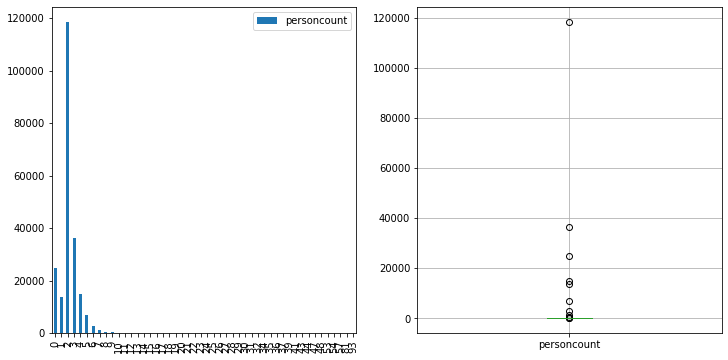

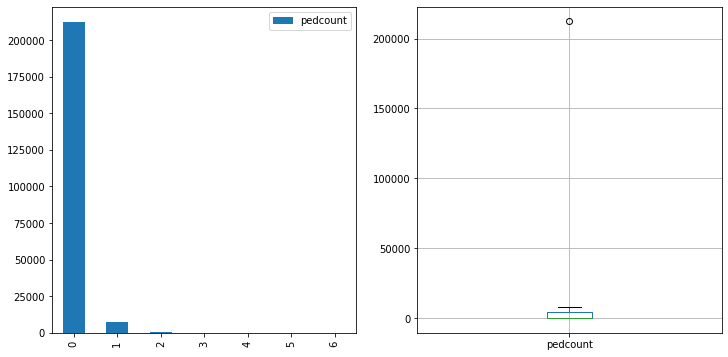

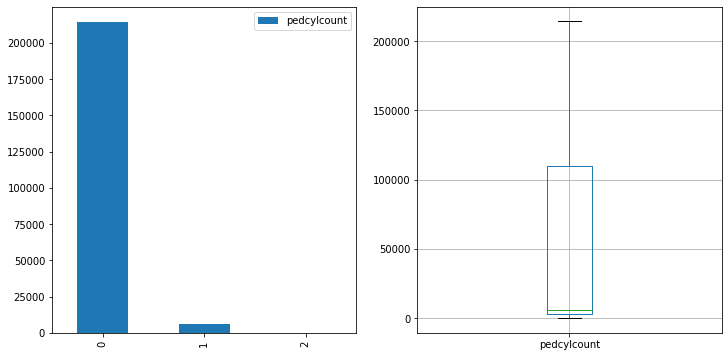

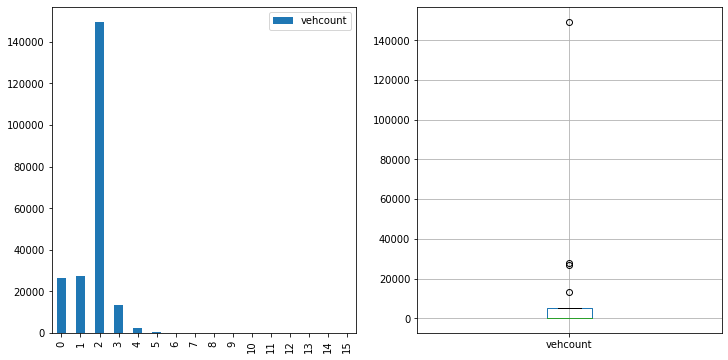

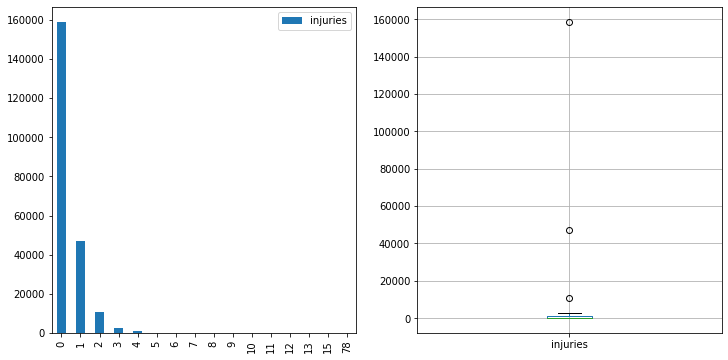

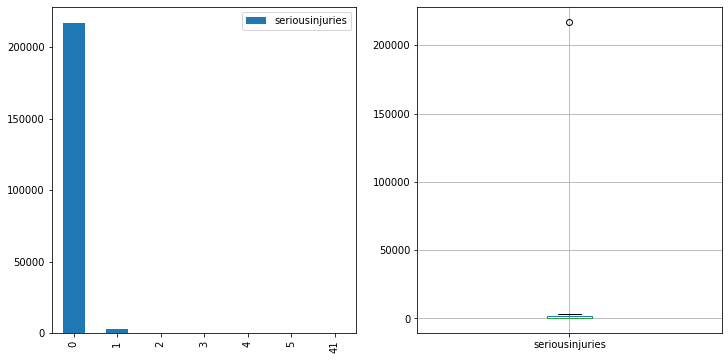

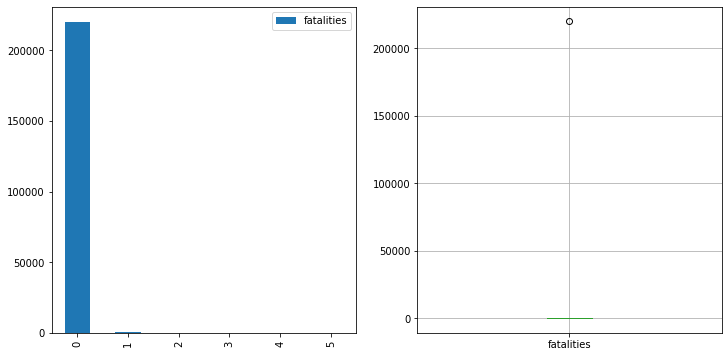

In [11]:
for column in num_columns:
    fig = plt.figure(figsize=(12, 6))
    
    left = fig.add_subplot(1, 2, 1)
    right = fig.add_subplot(1, 2, 2)
    
    tempdf = df[column].value_counts(sort=False, dropna=False).to_frame()
    tempdf.plot.bar(ax=left)
    tempdf.boxplot(ax=right)

It seems that the most common accidents involved:

- 2 people and 2 vehicles
- 0 pedestrians or cyclists
- 0 to 1 injuries
- 0 deaths
- It might be difficult to use `pedcount`, `pedcylcount`, `seriousinjuries`, and `fatalities` as measures of dangerous locations due to the lack of variability in these columns.

Let's try using the number of accidents as a way to measure a location's dangerousness next.

### Q2. Which locations have had the highest total number of accidents?

In [12]:
locdf = df['location'].value_counts().to_frame('count')
locdf = locdf.head(7)
locdf

,count
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,295
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280
6TH AVE AND JAMES ST,271
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,269
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256


- It's important to keep in mind that the heavier the traffic is, the more likely there is to be an accident. 
- So these locations may have the highest numers of accidents, but also may have the highest volume of overall traffic. 

Above, dangerousness was defined by the **total** number of incidents. Let's try looking into the number of **severe** incidents.

### Q3. Which locations have the highest numbers of severe incidents?

First, let's take a look at the categories of `severitycode`.

In [13]:
df['severitycode'] = df['severitycode'].map({
    '0': 'Unknown', 
    '1': 'Prop_damage_only', 
    '2': 'Injury',
    '2b': 'Serious_injury', '3': 'Fatality'
})

In [14]:
severity = df['severitycode'].value_counts(dropna=False).to_frame('count')
severity['Percentage'] = severity['count']/ (severity['count'].sum())
severity

,count,Percentage
Prop_damage_only,136883,0.621543
Injury,58390,0.265131
Unknown,21538,0.097797
Serious_injury,3072,0.013949
Fatality,347,0.001576
NaN,1,0.000005


Looks like the majority of the accidents only involve property damage. But about 27% of the accidents involve injuries.

In [15]:
most_sev = df[df['severitycode'].isin(['Fatality', 'Serious_injury', 'Injury'])]
most_sev = most_sev['location'].value_counts().to_frame('count')
# Select the top 7 locations; 5 seemed to few but 10 seemed too many...
most_sev = most_sev.head(7)
most_sev

,count
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,126
6TH AVE AND JAMES ST,112
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,97
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,96
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,96
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,93
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,82


Let's compare the locations with the highest numbers of **severe** incidents and locations with the highest numbers of **total** incidents.

In [16]:
# These are the locations with the highest numbers of severe incidents

mostsevlocations = list(most_sev.index)
sorted(mostsevlocations, key=str.lower)

['6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP']

In [17]:
# These are the locations with highest numbers of all incidents (extracted earlier)

manyaccident_locations = list(locdf.index)
sorted(manyaccident_locations, key=str.lower)

['6TH AVE AND JAMES ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N']

- 5 locations appear on both lists
- 2 locations only appear on the list of locations with most severe incidents
- 2 other locations only appear on the list of locations with highest number of incidents
- Looks like there is some overlap between the 2 lists
- Either the number of all accidents or number of severe accidents could be an indicator of dangerousness
- Caution: Locations may not be entered in a standardized manner. Using coordinates may be a better way to identify dangerous locations.

## Goal 2: identify predictors of accidents

### Q1. What are associated with the total number of accidents?

Now let's try to find factors associated with accidents by looking at: 
- External factors
- Human factors
- Characteristics of the collision site

### External factors

Let's take a look at `lightcond`.

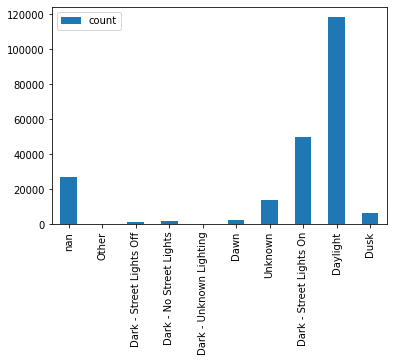

In [18]:
df['lightcond'].value_counts(sort=False, dropna=False).to_frame('count').plot.bar();

There are a lot of subcategories for `dark` conditions. Let's try combining them.

In [19]:
df['lightcond'] = df['lightcond'].replace({
   'Dark - No Street Lights': 'Dark',
   'Dark - Street Lights Off': 'Dark',
   'Dark - Street Lights On': 'Dark',
   'Dark - Unknown Lighting': 'Dark'
})

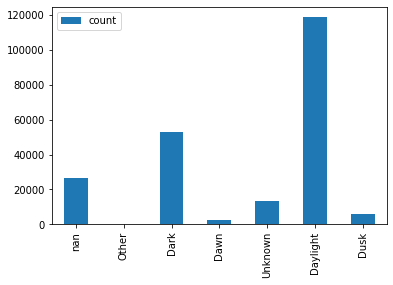

In [20]:
df['lightcond'].value_counts(sort=False, dropna=False).to_frame('count').plot.bar();

Even when the subcategories of Dark are combined, Daylight still has the highest frequency.

Next, check the frequencies for `weather`

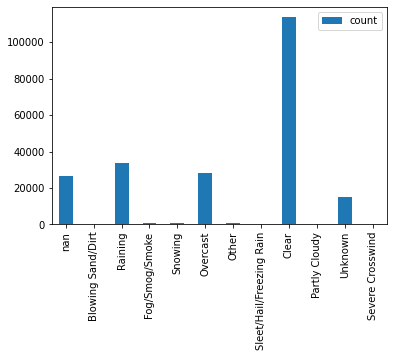

In [21]:
df['weather'].value_counts(sort=False, dropna=False).to_frame('count').plot.bar();

Most incidents happened in a clear weather. 

### Human factors

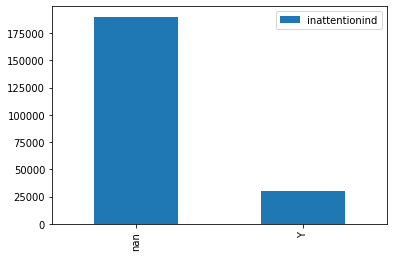

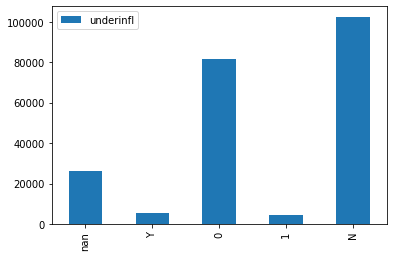

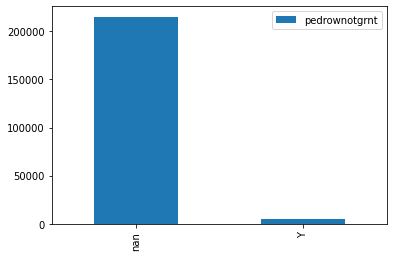

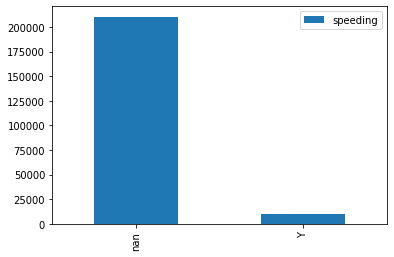

In [22]:
human_factors = ['inattentionind', 'underinfl', 'pedrownotgrnt', 'speeding']
for factor in human_factors:
    tempdf = df[factor].value_counts(sort=False, dropna=False).to_frame()
    tempdf.plot.bar()

- As you can see, there are a lot of missing data in these columns; something to keep in mind for doing analyses later.
- There are fewer missing values for `underinfl` (whether the driver was under the influence) but there is an inconsistency in values; some indicdents are recorded using `0`s and `1`s whereas some are recorded using `n`s and `y`s. 
- Assuming that `0`s = `n`s and `1`s = `y`s, in most cases, drivers were NOT under the influence.

### Characteristics of the collision site

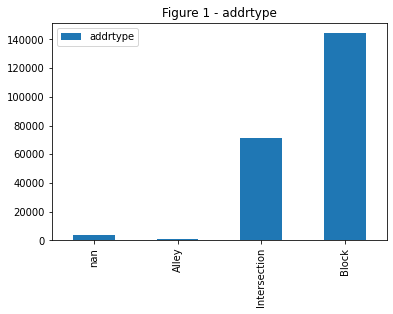

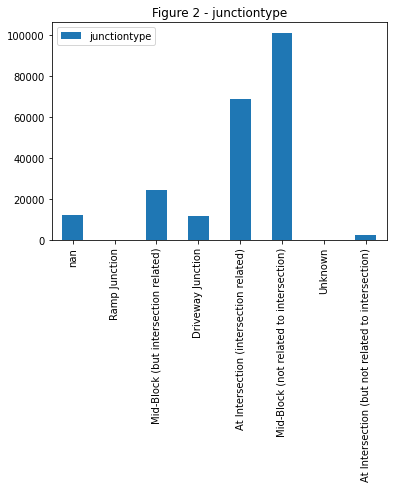

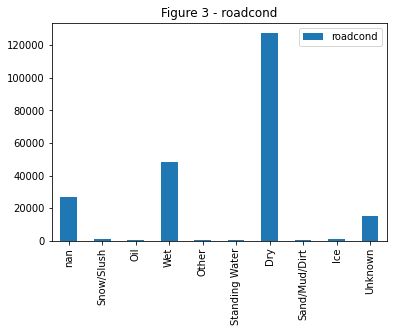

In [23]:
site_characteristics = ['addrtype', 'junctiontype', 'roadcond']

for index, column in enumerate(site_characteristics):
    tempdf = df[column].value_counts(sort=False, dropna=False).to_frame()
    tempdf.plot.bar()
    plt.title(f"Figure {index + 1} - {column}")

More than half of the incidents happened:
- mid-block rather than an intersection
- on a dry road

So far, it was found that many incidents happened
- in daylight
- in a clear weather
- mid-block
- on a dry road

Given these findings, can darkness and bad weather be ruled out as predictors of accidents?? To answer this question, additional steps need to be taken includding the following:
- Obatin the volume of traffic in each location on each day (because there is more traffic when the weather is nice or during the day)
- Divide the number of cars that got into accidents by the total traffic volume in each location on each day

### Q2. What are associated with severe accidents?

### Correlations among numeric variables

First, check what variables are correlated with injuries, serious injuries, and fatalities.

In [24]:
df[num_columns].corr(method="pearson").style.format("{:.2}").background_gradient()

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
personcount,1.0,0.012,-0.0093,0.56,0.32,0.11,0.046
pedcount,0.012,1.0,-0.016,-0.15,0.17,0.13,0.073
pedcylcount,-0.0093,-0.016,1.0,-0.15,0.12,0.062,0.011
vehcount,0.56,-0.15,-0.15,1.0,0.14,-0.0028,-0.01
injuries,0.32,0.17,0.12,0.14,1.0,0.28,0.067
seriousinjuries,0.11,0.13,0.062,-0.0028,0.28,1.0,0.17
fatalities,0.046,0.073,0.011,-0.01,0.067,0.17,1.0


- The number of people (`personcount`), pedestraians(`pedcount`), cyclists (`pedcylcount`), and vehicles (`vehcount`) involved show positive correlations with `injuries` greater than 0.1. 
- This finding suggests that, understandably, the more people are involved in the accident, the more injuries are involved as well (as opposed to property damage only).
- However, the correlations between injuries and the number of pedestraians(`pedcount`), cyclists (`pedcylcount`), and vehicles (`vehcount`) are fairly low.

### Does the description of each accident provide information about factors associated with severe accidents?

The `st_colcode` column provides information about what each vehicle or person was doing when the accident happened. These descriptions may give us some idea about how to prevent accidents. First, let's look at the descriptions for the overall dataset.

In [25]:
# Because there are 38 unique values for this column, select the top 7 for now
commondescriptions = df['st_coldesc'].value_counts()[:7]
commondescriptions = list(commondescriptions.index)
sorted(commondescriptions, key=str.lower)

['Entering at angle',
 'Fixed object',
 'From opposite direction - one left turn - one straight',
 'From same direction - both going straight - both moving - rear-end',
 'From same direction - both going straight - both moving - sideswipe',
 'From same direction - both going straight - one stopped - rear-end',
 'One parked--one moving']

Now let's take a look at the common categories for this column `st_coldesc` in the locations that had the highest number of severe accidents identified earlier.

In [26]:
mostsevlocations = list(most_sev.index)
mostsev_df = df[df['location'].isin(most_sev.index)]
# Again just focus on the top 7 common categories
desciptions = mostsev_df['st_coldesc'].value_counts().head(7)
mostsevdescriptions = list(desciptions.index)
sorted(mostsevdescriptions, key=str.lower)

['Entering at angle',
 'Fixed object',
 'From opposite direction - one left turn - one straight',
 'From same direction - both going straight - both moving - rear-end',
 'From same direction - both going straight - both moving - sideswipe',
 'From same direction - both going straight - one stopped - rear-end',
 'One car leaving driveway access']

- Comparing the two lists, most categories are the same, except for the last category on each list
- A vehicle hitting another parked vehicle was the 7th most common category for all the locations
- One car leaving driveway access was the 7th most common category for the locations with the highest numbers of severe accidents
- Now take a look at the distribution of these categories among the 7 locations

**Table 1**

In [27]:
mostsevdescript_df = mostsev_df[mostsev_df.st_coldesc.isin(mostsevdescriptions)]
pd.crosstab(mostsevdescript_df['location'], [mostsevdescript_df['st_coldesc']])

st_coldesc,Entering at angle,Fixed object,From opposite direction - one left turn - one straight,From same direction - both going straight - both moving - rear-end,From same direction - both going straight - both moving - sideswipe,From same direction - both going straight - one stopped - rear-end,One car leaving driveway access
location,,,,,,,
6TH AVE AND JAMES ST,59,2,138,1,4,8,0
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,9,14,34,29,20,68,8
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,41,8,11,8,19,82,26
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,0,188,0,18,15,28,0
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,43,3,11,13,26,79,42
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,27,12,15,22,46,51,13
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,1,32,0,54,52,58,0


- 'One car leaving driveway access' was more common at N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N than other locations
- 'Fixed object' was most common at BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB
- At this location, 'Fixed object' was also more common than other descriptions. What was the object that was getting hit by so many vehicles? Was it related to construction?
- 'From opposite direction - one left turn - one straight' was most commonly seen at 6TH AVE AND JAMES ST among the 7 locations

### Can we predict severity from junction type?

In [28]:
adf = df.groupby(['junctiontype', 'severitycode']).size().to_frame('count').reset_index()
adf.head()

,junctiontype,severitycode,count
0,At Intersection (but not related to intersection),Fatality,3
1,At Intersection (but not related to intersection),Injury,624
2,At Intersection (but not related to intersection),Prop_damage_only,1475
3,At Intersection (but not related to intersection),Serious_injury,23
4,At Intersection (but not related to intersection),Unknown,367


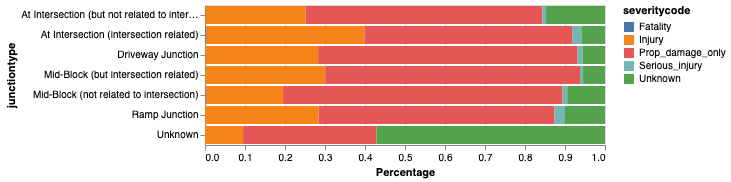

In [29]:
alt.Chart(adf).mark_bar().encode(
    x=alt.X('sum(count)', stack="normalize", title="Percentage"),
    y='junctiontype',
    color='severitycode',
    tooltip='sum(count)'
)

- It was shown earlier (Figure 2) that most accidents happened mid-block; about 65-70% of them only resulted in property damage and 20-30% resulted in injuries.
- Intersection related accidents were also common in Figure 2; about 50-60% only resulted in property damage and about 25-40% of the accidents involved injuries.

## Goal 3: Examine increase or decrease in number of accidents over time

### Q1. Has the number of accidents increased or decreased over time?

Let's first take a look at the general trend over time in the overall number of accidents

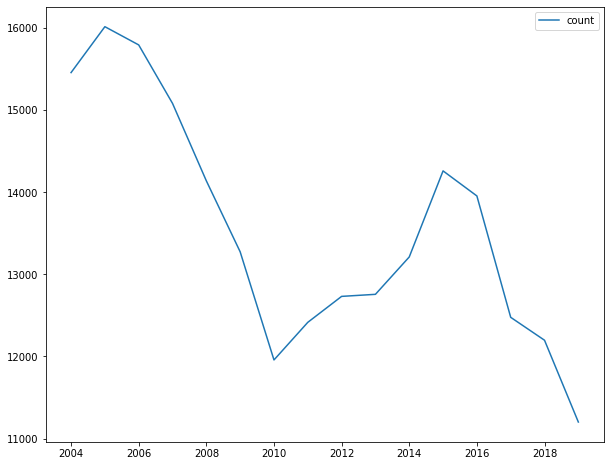

In [30]:
df['year'] = pd.DatetimeIndex(df.incdate).year  # alternate method
# Exclude year 2003 because there are only a handful of incidents for this year
df = df[df["year"] != 2003]
yeardf = df['year'].value_counts(dropna=False).to_frame('count')
yeardf = yeardf.sort_index()
# Exclude 2020 because the data are incomplete
yeardf = yeardf.loc[yeardf.index < 2020] 
yeardf.plot(figsize=(10, 8))

- It looks like there was a decline from 2004 to 2010, then an increase toward 2015, then a decline again toward 2019.
- What might have contributed to these declines and increase in accidents? Change in the volume of traffic? Did the City make changes to the location?

Would we see a similar pattern for the dangerous locations we have identified earlier? Let's take a look. 

### Q2. How has the number of incidents changed over time for the most dangerous locations?

Let's look at the changes over time in the locations with the highest number of incidents.

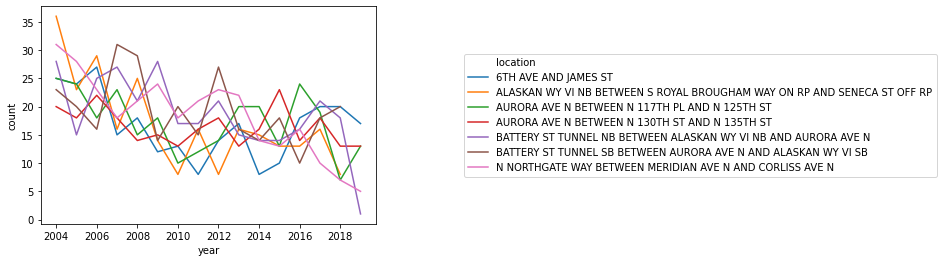

In [31]:
# First get the number of total accidents for each year for each of the 7 locations identified earlier
manyaccident_df = df[df['location'].isin(locdf.index)]
manyaccident_year_data = manyaccident_df.groupby(
    ['location', 'year']).size().to_frame('count').reset_index()
# Again exclude 2020 since data are still coming in
manyaccident_year_data = manyaccident_year_data[(manyaccident_year_data['year'] < 2020)]
g = sns.lineplot(x="year", y="count", hue="location", data=manyaccident_year_data)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

- In general, there is a downward trend toward 2018
- Green line is going up after 2018
- Brown line stops at 2018
- Note: Brown line is the location where many vehicles were hitting an object in Table 1
- Purple line took a sharp decline after 2018 (may have been closed for construction)

## Conclusions

This was my first time looking into collision data, and this dataset did not seem to offer a lot of information at first glance. But I did learn several things.  

- I had expected to find that bad weather or darkness is related to more accidents, but this data exploration reminded me that more accidents happen when more people travel during the day or when the weather is nice
- The majority of accidents involve property damage only and not injuries
- Even though I started this project because of seemingly dangerous intersections, this dataset tells me that more accidents happen mid-block than at intersections
- Table 1 tells me that different locations may have different risk factors for accidents, and may benefit from differentiated intervention
- I need more information or data (e.g., the total traffic volume for each location on each day, when each location was under consturction) to understand what is associated with accidents